<a href="https://colab.research.google.com/github/saisuryakeshetty/CNN_MNIST/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, Activation
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

# Data Preprocessing

In [ ]:
# load the data
data = pd.read_csv("/content/drive/MyDrive/Digit Recognizer/train.csv")

In [ ]:
# display the data(first 5 rows)
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# description of the data
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


<Axes: xlabel='label', ylabel='count'>

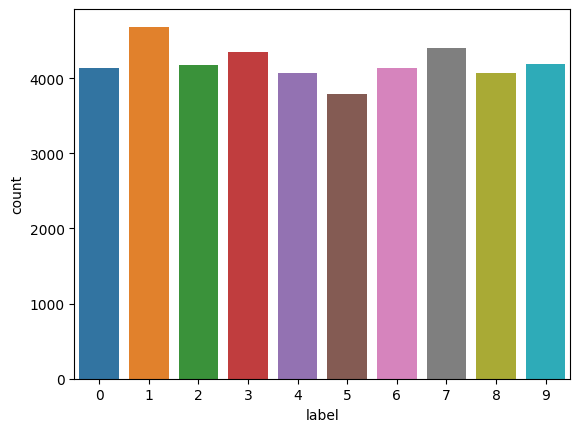

In [ ]:
# check distribution of labels
sns.countplot(x='label',data=data)

There are around 4000 images of each label. We have balanced dataset

In [ ]:
# seperate features and labels
X = data.drop(labels = ["label"],axis = 1)
Y = data["label"]

In [ ]:
# check for missing values
X.isnull().sum().sum()

0

There are no missing values in the data. So we can safely go ahead

In [ ]:
# reshape each image to 3 dimensions (28*28*1)
X = X.values.reshape(-1,28,28,1)

In [ ]:
# encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y = to_categorical(Y, num_classes = 10)

In [ ]:
# split data into training,validation,testing data
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=1,stratify=Y) # 15% data in testing set
X_train, X_val, Y_train, Y_val = train_test_split( X_train_val,  Y_train_val, test_size = 0.15, random_state=1,stratify =  Y_train_val) #85*.15 = 12.75% data in validation set

We expand dataset artificially by altering training data with small tranformations so that our model can predict correctly even if digits are written somewhat differently. This may also help in avoiding overfitting. Also all feature values are divided by 255 so that all values lie in [0,1]

In [ ]:
# generate new images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 10,
                                   shear_range = 0.1,
                                   zoom_range = 0.1,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)
train_generator = train_datagen.flow(X_train,Y_train,batch_size=32)
val_datagen = ImageDataGenerator(rescale = 1./255)
val_generator = val_datagen.flow(X_val,Y_val,batch_size=8)

# CNN Model

Using Keras Sequential we just have to add one layer at a time

Convolutional layer consists a set of learnable filters. Filter acts as a pattern. Each filter transforms regions of the image and give feature maps. The values in feature maps provides a measure for how close a region of image resembles a pattern.

Filters of first layer captures simple patters like edges, corners,dots...etc. Filters of subsequent layers combine those patterns to make bigger patterns. As we move forward in layers patterns get more complex and there are large combinations of patterns to capture.
Hernce we choose 32 filters for first two conv2D layers and increase filters to 64 for the two last ones.

Padding refers to the process of adding extra pixels to the image before convolution, common strategy is adding zeros around feature map. Padding ensures that edge pixels are adequately utilized,preserving information that might otherwise be lost and also preserves spacial dimensions of the feature map throughout the CNN architecture.

During training, the change in parameters change the distribution of inputs to hidden layers. When the input distribution changes, hidden layers try to learn to adapt to new distribution thereby slowing the training process. Batch normalization address this issue by normalising the inputs to hidden layers. Batch normalization can be applied before or after the activation function, research shows its best when applied before activation function.


Activation function is used to add non linearity to the network. ReLU activation helps speed up training and prevent vanishing gradient problem. We will use ReLU activation after Conv2D and Dense layers. We will use softmax function for last Dense layer to normalize output of a neural network to a probability distribution over predicted output classes.

We use MaxPool2D layer after Conv2D(after BatchNormalization,Activation) layer. Max Pooling finds the maximum value for regions of a feature map and uses it to create a downsampled feature map. The aim of this layer is to decrease the size of feature map to reduce the computational cost and also to make feature map robust to small changes in position of the features. Pooling also helps in reducing overfitting problem. Since some information is lost in every pooling layer, we use MaxPool2D only after 2nd,4th Conv2D layer.

Dropout layer is used to reduce the overfitting. Here a proportion of nodes in the layer are randomly ignored at each step during training forcing the network to learn features in a distributed way.

The Flatten layer is used to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.

In the end we use the features in two Dense layers which is just an artificial neural network classifier. Last layer outputs distribution of probability of each class.

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='Same',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='Same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Dropout(0.2))



model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

Loss function is used to measure how poorly our model performs on images with known labels. Models try to minimize loss function during training. We use Categorical cross-entropy loss function for multi-class classification.

 A metric is a function that is used to judge the performance of model. Here we use accuracy for metrics.


Optimizers are algorithms that adjust model's parameters (i.e. weights,biases,learning rates) during training to minimize a loss function. Adam optimizer is most popular one.

In [ ]:
model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics=["accuracy"])

Callback defines what happens before,during or at the end of training epoch. Early stopping is a callback that monitors a metric and stops the training when no improvement is observed. Early stopping helps to avoid overfitting.

 Here we monitor loss function(categorical_crossentropy) on validation dataset. Patience refers to epochs with no improvement after which training will be stopped.

In [ ]:
callback=EarlyStopping( monitor="val_loss",patience=5,verbose=2)

In [ ]:
model.fit(train_generator,validation_data=val_generator,epochs=20,callbacks=[callback])

Epoch 1/20
949/949 [==============================] - 47s 35ms/step - loss: 0.3199 - accuracy: 0.8997 - val_loss: 0.0641 - val_accuracy: 0.9804
Epoch 2/20
949/949 [==============================] - 22s 23ms/step - loss: 0.1254 - accuracy: 0.9612 - val_loss: 0.0419 - val_accuracy: 0.9869
Epoch 3/20
949/949 [==============================] - 24s 25ms/step - loss: 0.0967 - accuracy: 0.9702 - val_loss: 0.0378 - val_accuracy: 0.9890
Epoch 4/20
949/949 [==============================] - 25s 26ms/step - loss: 0.0875 - accuracy: 0.9727 - val_loss: 0.0297 - val_accuracy: 0.9908
Epoch 5/20
949/949 [==============================] - 23s 24ms/step - loss: 0.0762 - accuracy: 0.9774 - val_loss: 0.0417 - val_accuracy: 0.9877
Epoch 6/20
949/949 [==============================] - 23s 24ms/step - loss: 0.0719 - accuracy: 0.9780 - val_loss: 0.0271 - val_accuracy: 0.9907
Epoch 7/20
949/949 [==============================] - 22s 23ms/step - loss: 0.0688 - accuracy: 0.9790 - val_loss: 0.0247 - val_accuracy:

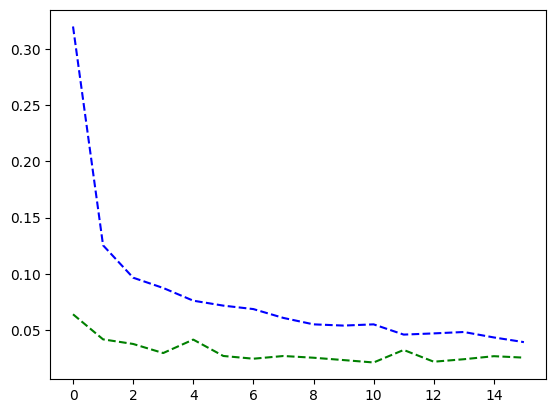

In [ ]:
#plot training and validation loss function
plt.plot(model.history.history['loss'],'b--')
plt.plot(model.history.history['val_loss'],'g--')

# Model Evaluation

In [ ]:
# convert Y_test back to integers
Y_test = [lst.argmax() for lst in Y_test]

In [ ]:
# Scaling testing data
X_test = X_test/255

In [ ]:
# predict labels for testing dataset
Y_test_pred = model.predict(X_test)
Y_test_pred = [lst.argmax() for lst in Y_test_pred]

197/197 [==============================] - 2s 7ms/step


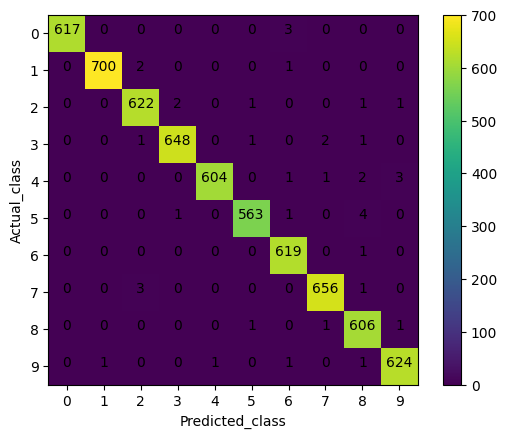

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(Y_test, Y_test_pred)

plt.imshow(cm)
plt.colorbar()
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
for i in range(10):
  for j in range(10):
    plt.text(j,i,cm[i,j],horizontalalignment="center")
plt.xlabel('Predicted_class')
plt.ylabel('Actual_class')
plt.show()

In [ ]:
# obtain precision,recall,f1-score,accuracy
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       620
           1       1.00      1.00      1.00       703
           2       0.99      0.99      0.99       627
           3       1.00      0.99      0.99       653
           4       1.00      0.99      0.99       611
           5       0.99      0.99      0.99       569
           6       0.99      1.00      0.99       620
           7       0.99      0.99      0.99       660
           8       0.98      1.00      0.99       609
           9       0.99      0.99      0.99       628

    accuracy                           0.99      6300
   macro avg       0.99      0.99      0.99      6300
weighted avg       0.99      0.99      0.99      6300



Our Model performed very well on test dataset(unseen data)